In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
titanic = pd.read_csv('titanic.csv',index_col=0)

In [13]:
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [14]:
((titanic.isna().sum())/len(titanic))*100
# True = 1
# False = 0
# Se multiplicar por 100 e dividir pela quantidade de True, podemos ver a quantidade de cabines fazias

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [15]:
titanic.Survived.sum()

342

In [16]:
len(titanic)

891

In [17]:
len(titanic) - titanic.Survived.sum()

549

In [18]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
titanic.groupby('Survived').count()

Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Survived                                                                     
0            549   549  549  424    549    549     549   549     68       549
1            342   342  342  290    342    342     342   342    136       340

In [20]:
titanic.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [21]:
titanic.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

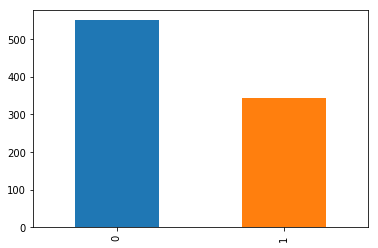

In [22]:
titanic.Survived.value_counts().plot(kind='bar')

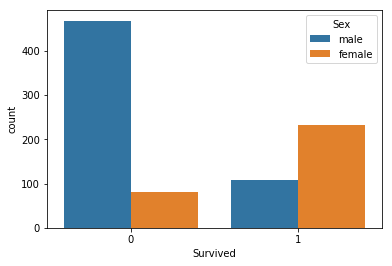

In [23]:
sns.countplot(data=titanic, x='Survived', hue='Sex')

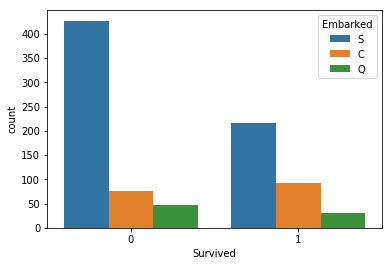

In [24]:
sns.countplot(data=titanic, x='Survived', hue='Embarked')

/Users/marcosferrarezi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


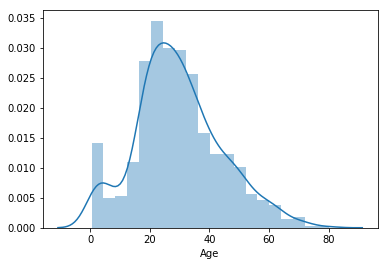

In [25]:
sns.distplot(titanic.Age.dropna())
# dropna elimina as celulas vazias nas colunas selecionadas
### SE O dropnar for dado na tabela inteira, caso uma coluna de qq linha esteja vazia, toda a linha sera eliminada, e
### e se todas as linhas estiver coluna vazia podemos perder todos os dados

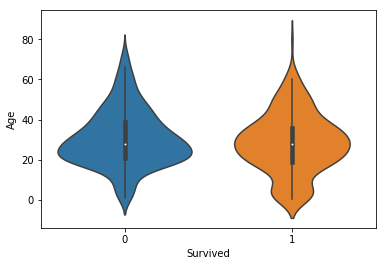

In [26]:
# distribuicao da idade de quem morreu e sobreviveu
sns.violinplot(data=titanic, x='Survived', y='Age')

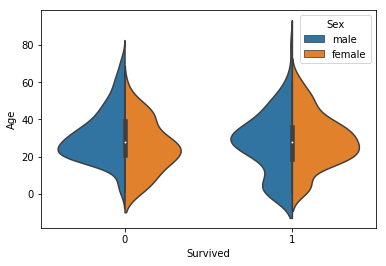

In [27]:
# distribuicao da idade de quem morreu e sobreviveu
sns.violinplot(data=titanic, x='Survived', y='Age', hue='Sex', split=True)

In [28]:
print('Media: ', titanic.Age.mean())
print('Median : ',titanic.Age.median())

Media:  29.69911764705882
Median :  28.0


In [29]:
print('Media: ', titanic.Fare.mean())
print('Median : ',titanic.Fare.median())

Media:  32.2042079685746
Median :  14.4542


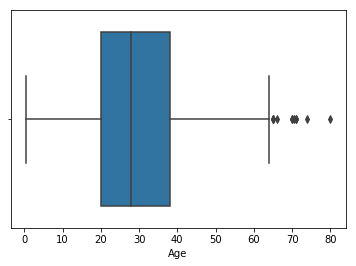

In [30]:
sns.boxplot(titanic.Age)

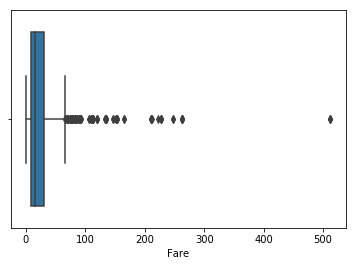

In [31]:
sns.boxplot(titanic.Fare)

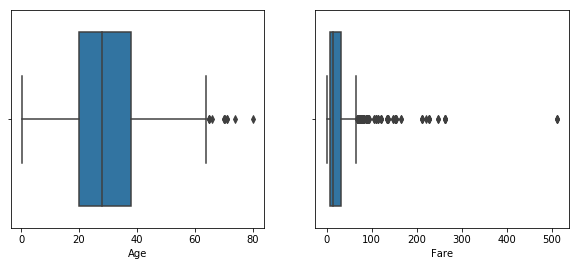

In [32]:
# fig=moldura/figura e axes = qte linhas e colunas na moldura
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.boxplot(titanic.Age, ax=axes[0])
sns.boxplot(titanic.Fare, ax=axes[1])
fig.set_figwidth(10)

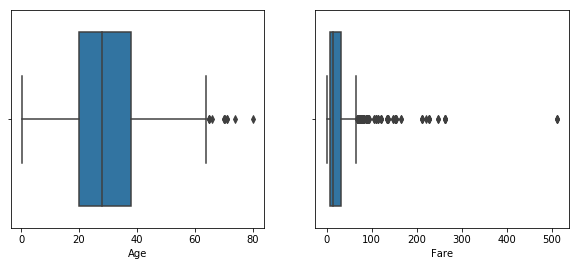

In [33]:
# fig=moldura/figura e axes = qte linhas e colunas na moldura
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.boxplot(titanic.Age, ax=axes[0])
sns.boxplot(titanic.Fare, ax=axes[1])
fig.set_figwidth(10)

In [34]:
titanic.Pclass.mode()

0    3
dtype: int64

In [35]:
titanic.Embarked.isna().sum()

2

In [36]:
titanic.Embarked.fillna(titanic.Embarked.mode())

PassengerId
1      S
2      C
3      S
4      S
5      S
6      Q
7      S
8      S
9      S
10     C
11     S
12     S
13     S
14     S
15     S
16     S
17     Q
18     S
19     S
20     C
21     S
22     S
23     Q
24     S
25     S
26     S
27     C
28     S
29     Q
30     S
      ..
862    S
863    S
864    S
865    S
866    S
867    C
868    S
869    S
870    S
871    S
872    S
873    S
874    S
875    C
876    C
877    S
878    S
879    S
880    C
881    S
882    S
883    S
884    S
885    S
886    Q
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [37]:
# Separar por sexo, se mulher=1 e homem=

titanic.Sex.unique()

array(['male', 'female'], dtype=object)

In [38]:
titanic.loc[titanic.Sex == 'male', 'Age'] = \
titanic.loc[titanic.Sex == 'male', 'Age'].fillna(titanic.loc[titanic.Sex == 'male', 'Age'].median())

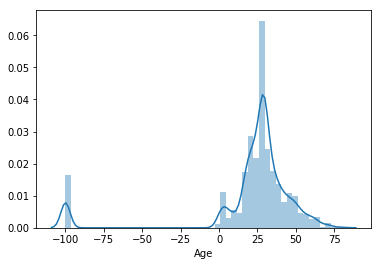

In [39]:
# distribuicao normal para idade menor -100, pois a ausencia de dados também é um dado
sns.distplot(titanic.Age.fillna(-100))

[Text(0, 0.5, 'Frequência'),
 Text(0.5, 0, 'Idade'),
 Text(0.5, 1.0, '3ª Classe')]

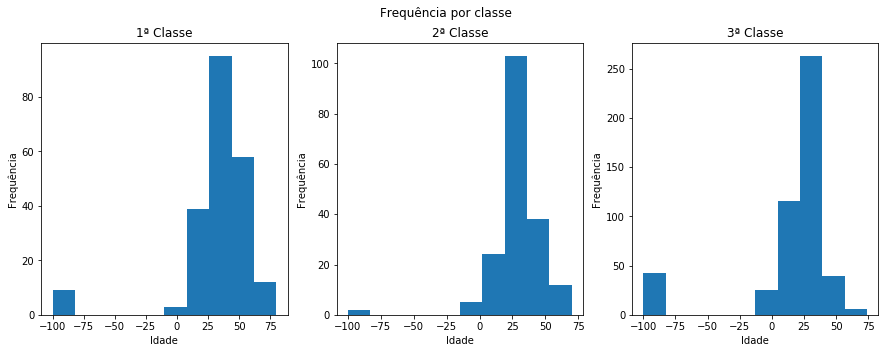

In [40]:
# distribuicao normal para idade menor -100, pois a ausencia de dados também é um dado
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
titanic.loc[titanic.Pclass == 1, 'Age'].fillna(-100).plot(kind='hist', ax=axes[0])
titanic.loc[titanic.Pclass == 2, 'Age'].fillna(-100).plot(kind='hist', ax=axes[1])
titanic.loc[titanic.Pclass == 3, 'Age'].fillna(-100).plot(kind='hist', ax=axes[2])
fig.suptitle('Frequência por classe')
axes[0].set(title='1ª Classe', ylabel='Frequência', xlabel='Idade')
axes[1].set(title='2ª Classe', ylabel='Frequência', xlabel='Idade')
axes[2].set(title='3ª Classe', ylabel='Frequência', xlabel='Idade')

In [41]:
titanic.Name
# ordem, Nome , Titulo , Pessoa

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
6                                       Moran, Mr. James
7                                McCarthy, Mr. Timothy J
8                         Palsson, Master. Gosta Leonard
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
11                       Sandstrom, Miss. Marguerite Rut
12                              Bonnell, Miss. Elizabeth
13                        Saundercock, Mr. William Henry
14                           Andersson, Mr. Anders Johan
15                  Vestrom, Miss. Hulda Amanda Adolfina
16                      Hewlett, Mrs. (Mary D Kingcome) 
17                                  Rice, Master. Eugene
18                 

In [42]:
# ordem, Nome , Titulo , Pessoa
titanic.Name[1]


'Braund, Mr. Owen Harris'

In [43]:
#Achar o titulo do passageiro
nome = titanic.Name[1]
nome.split(',')

['Braund', ' Mr. Owen Harris']

In [44]:
#Achar o titulo do passageiro
nome = titanic.Name[1]
nome.split(',')[1].split(' ')

['', 'Mr.', 'Owen', 'Harris']

In [45]:
#Achar o titulo todos os passageiros
nome = titanic.Name[1]
nome.split(',')[1].split(' ')[1]

'Mr.'

In [46]:
#Achar o titulo todos os passageiros
# Separa o campo nome em lista que sera separada por espacos, e pode ser que em uma linha tenha 5 colunas
# e outra 4 em funcao do nome de cada passageiro.
# veja que o comando abaixo e o da linha 116 apenas detalhado
def trata_nome(nome):
    lista = nome.split(',')
    nome2 = lista[1]
    lista2 = nome2.split(' ')
    titulo = lista2[1]
    return titulo
titanic.Name.apply(trata_nome) # faz a funcao rodar em todas as linhas na memoria

PassengerId
1          Mr.
2         Mrs.
3        Miss.
4         Mrs.
5          Mr.
6          Mr.
7          Mr.
8      Master.
9         Mrs.
10        Mrs.
11       Miss.
12       Miss.
13         Mr.
14         Mr.
15       Miss.
16        Mrs.
17     Master.
18         Mr.
19        Mrs.
20        Mrs.
21         Mr.
22         Mr.
23       Miss.
24         Mr.
25       Miss.
26        Mrs.
27         Mr.
28         Mr.
29       Miss.
30         Mr.
        ...   
862        Mr.
863       Mrs.
864      Miss.
865        Mr.
866       Mrs.
867      Miss.
868        Mr.
869        Mr.
870    Master.
871        Mr.
872       Mrs.
873        Mr.
874        Mr.
875       Mrs.
876      Miss.
877        Mr.
878        Mr.
879        Mr.
880       Mrs.
881       Mrs.
882        Mr.
883      Miss.
884        Mr.
885        Mr.
886       Mrs.
887       Rev.
888      Miss.
889      Miss.
890        Mr.
891        Mr.
Name: Name, Length: 891, dtype: object

In [47]:
titanic['Title'] = titanic.Name.apply(trata_nome)
titanic.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [48]:
contagem = titanic.Title.value_counts()
contagem

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Don.           1
Ms.            1
Sir.           1
the            1
Capt.          1
Mme.           1
Jonkheer.      1
Lady.          1
Name: Title, dtype: int64

In [49]:
comuns = contagem.index[0:3]
nobres = contagem.index [3:]

In [50]:
def trata_titulo(titulo):
    if titulo in comuns:
        return 'comun'
    else:
        return 'nobre'

In [51]:
titanic['ClasseSocial'] = titanic.Title.apply(trata_titulo)

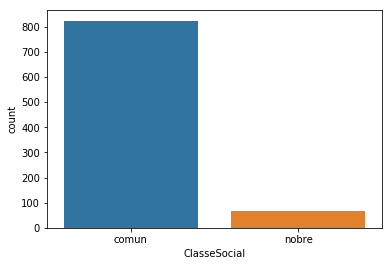

In [52]:
sns.countplot(titanic.ClasseSocial)

In [53]:
dicio = {'male':0, 'female':1}

In [54]:
titanic.Sex.map(dicio)

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     1
16     1
17     0
18     0
19     1
20     1
21     0
22     0
23     1
24     0
25     1
26     1
27     0
28     0
29     1
30     0
      ..
862    0
863    1
864    1
865    0
866    1
867    1
868    0
869    0
870    0
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    1
884    0
885    0
886    1
887    0
888    1
889    1
890    0
891    0
Name: Sex, Length: 891, dtype: int64

In [55]:
lista = [1,2,3,4,9]
lista2= [5,5,6,7]

In [56]:
zip(lista,lista2)  # zip agrupa e depois tenho que pedir alguma coisa como o groupby

In [57]:
list(zip(lista,lista2))

[(1, 5), (2, 5), (3, 6), (4, 7)]

In [58]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [59]:
zip(titanic.Embarked.unique(), [1,2,3])

In [60]:
dict(zip(titanic.Embarked.unique(), [1,2,3]))

{'S': 1, 'C': 2, 'Q': 3}

In [61]:
dicio = dict(zip(titanic.Embarked.unique(), [1,2,3]))

In [62]:
titanic.Embarked.map(dicio)

PassengerId
1      1.0
2      2.0
3      1.0
4      1.0
5      1.0
6      3.0
7      1.0
8      1.0
9      1.0
10     2.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     3.0
18     1.0
19     1.0
20     2.0
21     1.0
22     1.0
23     3.0
24     1.0
25     1.0
26     1.0
27     2.0
28     1.0
29     3.0
30     1.0
      ... 
862    1.0
863    1.0
864    1.0
865    1.0
866    1.0
867    2.0
868    1.0
869    1.0
870    1.0
871    1.0
872    1.0
873    1.0
874    1.0
875    2.0
876    2.0
877    1.0
878    1.0
879    1.0
880    2.0
881    1.0
882    1.0
883    1.0
884    1.0
885    1.0
886    3.0
887    1.0
888    1.0
889    1.0
890    2.0
891    3.0
Name: Embarked, Length: 891, dtype: float64

In [63]:
titanic.Cabin

PassengerId
1              NaN
2              C85
3              NaN
4             C123
5              NaN
6              NaN
7              E46
8              NaN
9              NaN
10             NaN
11              G6
12            C103
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             D56
23             NaN
24              A6
25             NaN
26             NaN
27             NaN
28     C23 C25 C27
29             NaN
30             NaN
          ...     
862            NaN
863            D17
864            NaN
865            NaN
866            NaN
867            NaN
868            A24
869            NaN
870            NaN
871            NaN
872            D35
873    B51 B53 B55
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            NaN
880            C50
881            NaN
882            NaN


In [64]:
titanic.Embarked.map(dicio)

PassengerId
1      1.0
2      2.0
3      1.0
4      1.0
5      1.0
6      3.0
7      1.0
8      1.0
9      1.0
10     2.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     3.0
18     1.0
19     1.0
20     2.0
21     1.0
22     1.0
23     3.0
24     1.0
25     1.0
26     1.0
27     2.0
28     1.0
29     3.0
30     1.0
      ... 
862    1.0
863    1.0
864    1.0
865    1.0
866    1.0
867    2.0
868    1.0
869    1.0
870    1.0
871    1.0
872    1.0
873    1.0
874    1.0
875    2.0
876    2.0
877    1.0
878    1.0
879    1.0
880    2.0
881    1.0
882    1.0
883    1.0
884    1.0
885    1.0
886    3.0
887    1.0
888    1.0
889    1.0
890    2.0
891    3.0
Name: Embarked, Length: 891, dtype: float64

In [65]:
# Para saber o que esta em cada coluna do banco
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             838 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Title           891 non-null object
ClasseSocial    891 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 137.5+ KB


In [66]:
# encontrar qual e o Deck de das cabines
def trata_cabin(x):
    if type(x) == str:
        return x[0]
    else:
        return x

In [67]:
titanic['Deck'] = titanic.Cabin.apply(trata_cabin)

In [68]:
# demonstra o dado com o DECK
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  Title  \
PassengerId                                                                  
1                1      0         A/5 21171   7.2500   NaN        S    Mr.   
2                1      0          PC 17599  71.2833   C85        C   Mrs.   
3                0      0  STON/O2. 3101282   7.9250   NaN        S  Miss.   
4                1      0            113803  53.1000  C123        S   Mrs.   
5                0      0            373450   8.0500   NaN        S    Mr.   

            ClasseSocial Deck  
PassengerId                    
1                  comun  NaN  
2                  comun    C  
3                  comun  NaN  
4                  comun    C  
5                  comun  NaN

In [71]:
# Criando uma tabela dinamica
titanic.pivot_table(columns='Deck', index='Pclass', values='Age', aggfunc=np.mean)
# coluna = Deck
# Indice = Classe
# Valor = Idade
# Argumento valor = Média idade

Deck            A          B          C          D          E        F      G  \
Pclass                                                                          
1       41.666667  34.826087  35.340702  39.642857  40.083333      NaN    NaN   
2             NaN        NaN        NaN  32.250000  38.833333  16.6875    NaN   
3             NaN        NaN        NaN        NaN  21.666667  28.7500  14.75   

Deck       T  
Pclass        
1       45.0  
2        NaN  
3        NaN

In [75]:
# Criando uma tabela dinamica
titanic.pivot_table(columns='Deck', index='Pclass', values='Fare', aggfunc=np.mean)
# coluna = Deck
# Indice = Classe
# Valor = Vl. passagem
# Argumento valor = Média

Deck            A           B           C          D          E         F  \
Pclass                                                                      
1       39.623887  113.505764  100.151341  63.324286  55.740168       NaN   
2             NaN         NaN         NaN  13.166675  11.587500  23.75000   
3             NaN         NaN         NaN        NaN  11.000000  10.61166   

Deck           G     T  
Pclass                  
1            NaN  35.5  
2            NaN   NaN  
3       13.58125   NaN

In [76]:
# Criando uma tabela dinamica
titanic.pivot_table(columns='Deck', index='Pclass', values='Fare', aggfunc=np.min)
# coluna = Deck
# Indice = Classe
# Valor = Vl. passagem
# Argumento valor = Minimo

Deck      A    B      C        D        E      F        G     T
Pclass                                                         
1       0.0  0.0  26.55  25.9292  25.5875    NaN      NaN  35.5
2       NaN  NaN    NaN  12.8750  10.5000  10.50      NaN   NaN
3       NaN  NaN    NaN      NaN   8.0500   7.65  10.4625   NaN

In [77]:
# Criando uma tabela dinamica com filtros na seleção
pivot_deck=titanic.pivot_table(columns='Deck', index='Pclass', values='Fare', aggfunc=np.min)
# coluna = Deck
# Indice = Classe
# Valor = Vl. passagem
# Argumento valor = Minimo

In [78]:
pivot_deck

Deck      A    B      C        D        E      F        G     T
Pclass                                                         
1       0.0  0.0  26.55  25.9292  25.5875    NaN      NaN  35.5
2       NaN  NaN    NaN  12.8750  10.5000  10.50      NaN   NaN
3       NaN  NaN    NaN      NaN   8.0500   7.65  10.4625   NaN

In [85]:
pivot_deck[['T','B','D']]

Deck       T    B        D
Pclass                    
1       35.5  0.0  25.9292
2        NaN  NaN  12.8750
3        NaN  NaN      NaN

In [91]:
pivot_deck.loc[2,['A','B','D']]

Deck
A       NaN
B       NaN
D    12.875
Name: 2, dtype: float64